In [1]:
import pandas as pd
from pathlib import Path

In [2]:
code_dir=Path.cwd()
project_dir=code_dir.parent
input_dir=project_dir/"input"
output_dir=project_dir/"output/roilevel_analysis_results"
tmp_dir=project_dir/"tmp"

output_dir.mkdir(exist_ok=True)

# Visualization

In [3]:
palm_dir = project_dir/"output/roi_palm"

In [4]:
rois = pd.read_csv(palm_dir/"rois.txt", header=None)

result_dict = {}
result_dict_pvals = {}
result_dict_cortex = {}
result_dict_cortex_signif = {}
result_dict_subcortex = {}
result_dict_subcortex_signif = {}
result_dict_gm = {}
result_dict_gm_signif = {}
result_dict_tracts = {}
result_dict_tracts_signif = {}

for result_dir in sorted(palm_dir.glob("*LNM*")):
    
    betas = pd.read_csv(result_dir/"palm_dat_cope.csv", header=None)
    pvals = pd.read_csv(result_dir/"palm_dat_tstat_fwep.csv", header=None) * 4
    betas.columns = rois.values.flatten()
    pvals.columns = rois.values.flatten()

    betas_signif = betas.copy()
    betas_signif[pvals>=0.05] = None

    betas_cortex = betas.iloc[:,:400]
    betas_signif_cortex = betas_signif.iloc[:,:400]
    betas_subcortex = betas.iloc[:,400:416]
    betas_signif_subcortex = betas_signif.iloc[:,400:416]
    betas_tracts = betas.iloc[:,416:]
    betas_signif_tracts = betas_signif.iloc[:,416:]

    betas_gm = betas.iloc[:,:416]
    betas_gm_signif = betas_signif.iloc[:,:416]

    result_dict[result_dir.name] = betas
    result_dict_pvals[result_dir.name] = pvals
    result_dict_cortex[result_dir.name] = betas_cortex
    result_dict_cortex_signif[result_dir.name] = betas_signif_cortex
    result_dict_subcortex[result_dir.name] = betas_subcortex
    result_dict_subcortex_signif[result_dir.name] = betas_signif_subcortex
    result_dict_gm[result_dir.name] = betas_gm
    result_dict_gm_signif[result_dir.name] = betas_gm_signif
    result_dict_tracts[result_dir.name] = betas_tracts
    result_dict_tracts_signif[result_dir.name] = betas_signif_tracts

In [5]:
labels = rois

In [6]:
beta_index_name_styling_dict = {
    'fLNM_attention':'fLNM - Attention / Executive function', 
    'fLNM_ips':'fLNM - IPS', 
    'fLNM_language':'fLNM - Language', 
    'fLNM_verbal_memory':'fLNM - Verbal memory', 
    'sLNM_attention':'sLNM - Attention / Executive function', 
    'sLNM_ips':'sLNM - IPS', 
    'sLNM_language':'sLNM - Language', 
    'sLNM_verbal_memory':'sLNM - Verbal memory'
}

In [7]:
import numpy as np

def plot_schaefer_on_fslr(data_schaefer400_signif, label_text, cmap="coolwarm_r"): #data_schaefer400, 
    from netneurotools.datasets import fetch_schaefer2018
    from neuromaps.images import dlabel_to_gifti
    from neuromaps.parcellate import Parcellater
    from brainspace.datasets import load_parcellation

    schaefer = fetch_schaefer2018('fslr32k')['400Parcels7Networks']

    # from neuromaps import transforms
    from neuromaps.datasets import fetch_fslr
    from surfplot import Plot

    surfaces = fetch_fslr()
    lh, rh = surfaces['inflated']
    p = Plot(lh, rh, size=(800,200), zoom=1.2,  layout="row",
             brightness=1, mirror_views=True) # label_text={"left":[]}

    parc = Parcellater(dlabel_to_gifti(schaefer), 'fsLR', resampling_target="data")
    data_fslr_signif = parc.inverse_transform(data_schaefer400_signif)
    lh_parc, rh_parc = load_parcellation('schaefer')

    lh_sulc, rh_sulc = surfaces['sulc']
    p.add_layer({'left': lh_sulc, 'right': rh_sulc}, cmap='binary_r', cbar=False, alpha=0.7)

    p.add_layer({"left":data_fslr_signif[0],"right":data_fslr_signif[1]}, cmap=cmap, 
                cbar_label= r'$\beta$', color_range=(-0.2,0.2), alpha=0.9) #cbar_label= f"{label_text} - " + r'$\beta$'

    p.add_layer({'left': lh_parc, 'right': rh_parc}, cmap='gray',
            as_outline=True, cbar=False)

    kws = {'location': 'right', 'decimals': 1, 'label_direction': 0,
        'fontsize': 10, 'n_ticks': 2, 'shrink': .4, 'aspect': 10,
        'draw_border': True}
    fig = p.build(cbar_kws=kws)

    return fig

In [ ]:
for k,v in result_dict_cortex_signif.items():
    cmap = "RdBu"
    plot = plot_schaefer_on_fslr(
        data_schaefer400_signif=v.values.flatten(), 
        label_text=beta_index_name_styling_dict[k], 
        cmap=cmap)
    plot.savefig(output_dir/f"surfplot_{k}.png", dpi=300)


# Yeo networks

Visual - p-value: 0.91
Somatomotor - p-value: 0.14
Dorsal Attention - p-value: 0.0
Ventral Attention - p-value: 0.01
Limbic - p-value: 1.0
Frontoparietal - p-value: 0.29
Default mode - p-value: 0.54
[[ 0.0011424 ]
 [-0.11223067]
 [-0.15642319]
 [-0.11125889]
 [ 0.03437258]
 [-0.08455819]
 [-0.07063373]]
{'Visual': False, 'Somatomotor': False, 'Dorsal Attention': True, 'Ventral Attention': True, 'Limbic': False, 'Frontoparietal': False, 'Default mode': False}


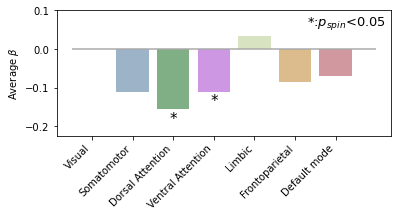

Visual - p-value: 0.85
Somatomotor - p-value: 0.11
Dorsal Attention - p-value: 0.0
Ventral Attention - p-value: 0.1
Limbic - p-value: 1.0
Frontoparietal - p-value: 0.35
Default mode - p-value: 0.94
[[-0.00175257]
 [-0.0713717 ]
 [-0.11508499]
 [-0.0610646 ]
 [ 0.02904371]
 [-0.04715509]
 [-0.02607746]]
{'Visual': False, 'Somatomotor': False, 'Dorsal Attention': True, 'Ventral Attention': False, 'Limbic': False, 'Frontoparietal': False, 'Default mode': False}


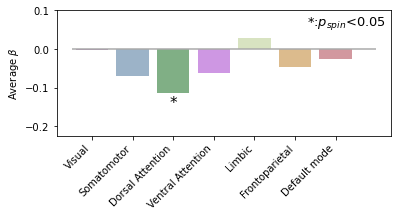

Visual - p-value: 0.65
Somatomotor - p-value: 0.73
Dorsal Attention - p-value: 0.0
Ventral Attention - p-value: 0.18
Limbic - p-value: 1.0
Frontoparietal - p-value: 0.28
Default mode - p-value: 0.82
[[ 0.00143301]
 [-0.00222107]
 [-0.04987549]
 [-0.0134172 ]
 [ 0.03129286]
 [-0.00883292]
 [-0.00165821]]
{'Visual': False, 'Somatomotor': False, 'Dorsal Attention': True, 'Ventral Attention': False, 'Limbic': False, 'Frontoparietal': False, 'Default mode': False}


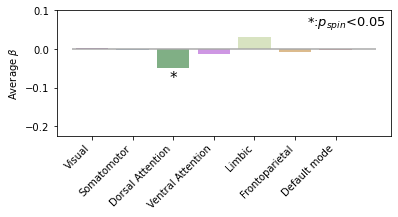

Visual - p-value: 1.0
Somatomotor - p-value: 0.09
Dorsal Attention - p-value: 0.0
Ventral Attention - p-value: 0.0
Limbic - p-value: 0.98
Frontoparietal - p-value: 0.35
Default mode - p-value: 0.59
[[ 0.03914335]
 [-0.07972548]
 [-0.0982821 ]
 [-0.09410431]
 [ 0.02142115]
 [-0.04903574]
 [-0.04259149]]
{'Visual': False, 'Somatomotor': False, 'Dorsal Attention': True, 'Ventral Attention': True, 'Limbic': False, 'Frontoparietal': False, 'Default mode': False}


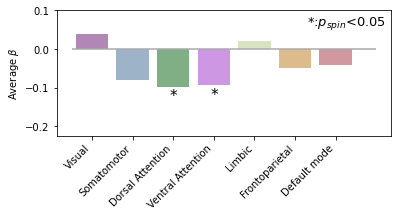

Visual - p-value: 0.83
Somatomotor - p-value: 0.28
Dorsal Attention - p-value: 0.01
Ventral Attention - p-value: 0.07
Limbic - p-value: 0.74
Frontoparietal - p-value: 0.16
Default mode - p-value: 0.19
[[-0.03166033]
 [-0.06367968]
 [-0.07812322]
 [-0.07052834]
 [-0.03962873]
 [-0.06787856]
 [-0.06142118]]
{'Visual': False, 'Somatomotor': False, 'Dorsal Attention': True, 'Ventral Attention': False, 'Limbic': False, 'Frontoparietal': False, 'Default mode': False}


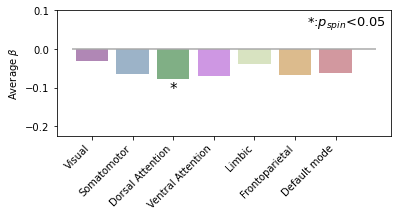

Visual - p-value: 0.67
Somatomotor - p-value: 0.52
Dorsal Attention - p-value: 0.02
Ventral Attention - p-value: 0.42
Limbic - p-value: 0.73
Frontoparietal - p-value: 0.06
Default mode - p-value: 0.17
[[-0.0361044 ]
 [-0.03946203]
 [-0.05534119]
 [-0.03959942]
 [-0.03301286]
 [-0.05258893]
 [-0.04540347]]
{'Visual': False, 'Somatomotor': False, 'Dorsal Attention': True, 'Ventral Attention': False, 'Limbic': False, 'Frontoparietal': False, 'Default mode': False}


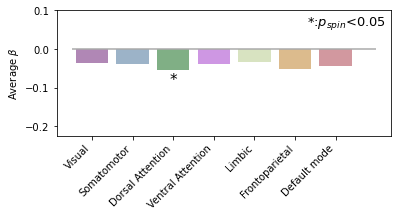

Visual - p-value: 0.46
Somatomotor - p-value: 0.44
Dorsal Attention - p-value: 0.17
Ventral Attention - p-value: 0.4
Limbic - p-value: 0.87
Frontoparietal - p-value: 0.41
Default mode - p-value: 0.23
[[-0.01863535]
 [-0.02399365]
 [-0.03037684]
 [-0.02118759]
 [-0.00470325]
 [-0.02080282]
 [-0.02605351]]
{'Visual': False, 'Somatomotor': False, 'Dorsal Attention': False, 'Ventral Attention': False, 'Limbic': False, 'Frontoparietal': False, 'Default mode': False}


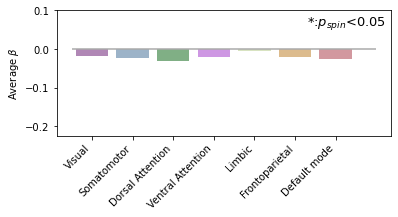

Visual - p-value: 0.93
Somatomotor - p-value: 0.5
Dorsal Attention - p-value: 0.4
Ventral Attention - p-value: 0.01
Limbic - p-value: 0.77
Frontoparietal - p-value: 0.01
Default mode - p-value: 0.01
[[-0.01154189]
 [-0.04502843]
 [-0.05134843]
 [-0.06537473]
 [-0.03873726]
 [-0.06734156]
 [-0.06491122]]
{'Visual': False, 'Somatomotor': False, 'Dorsal Attention': False, 'Ventral Attention': True, 'Limbic': False, 'Frontoparietal': True, 'Default mode': True}


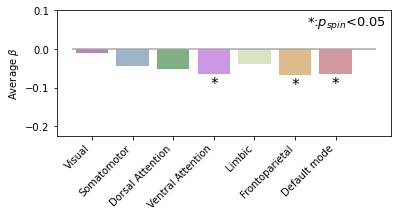

In [9]:
from brainstat.context.resting import yeo_networks_associations
from enigmatoolbox.utils.parcellation import parcel_to_surface
from neuromaps.nulls import alexander_bloch
from brainstat.datasets import fetch_yeo_networks_metadata
import seaborn as sns
import matplotlib.pyplot as plt


network_names, yeo_colormap = fetch_yeo_networks_metadata(7)
yeo_colormap = yeo_colormap * 0.4 + 0.5

for var in result_dict_cortex_signif.keys():

    beta_fslr32k = parcel_to_surface(np.squeeze(result_dict_cortex[var]), 'schaefer_400_conte69')
    yeo_stat = yeo_networks_associations(beta_fslr32k, "fslr32k")
    beta_rotated_fslr32k = alexander_bloch(beta_fslr32k, atlas='fsLR', density='32k',
                                    n_perm=100, seed=42)

    yeo_stat_permuted = np.apply_along_axis(lambda x: yeo_networks_associations(np.squeeze(x), "fslr32k"), 0, beta_rotated_fslr32k)

    pval_dict = dict()
    for idx in range(yeo_stat.shape[0]):
        p_value = np.mean(yeo_stat[idx] > yeo_stat_permuted[idx])
        pval_dict[network_names[idx]]= p_value
        print(f"{network_names[idx]} - p-value: {p_value}")

    sig_dict = dict()
    for k,v in pval_dict.items():
        if pval_dict[k] < 0.05:
            sig_dict[k] = True
        else: sig_dict[k] = False


    fig, ax = plt.subplots(figsize=(6, 3))
    ax.bar(np.arange(7), yeo_stat[:, 0], color=yeo_colormap)

    print(yeo_stat)
    print(sig_dict)
    for idx,(key,value) in enumerate(sig_dict.items()):
        if value == 1:
        
            bar = ax.patches[idx]
    
            ax.annotate("*",
                        (bar.get_x() + bar.get_width() / 2,
                            bar.get_height() - 0.045), ha='center', va='center',
                        size=15, xytext=(0, 8),
                        textcoords='offset points')
    plt.ylabel(r"Average $\beta$")
    plt.xticks(np.arange(7), network_names, rotation=45, ha="right")
    plt.hlines(0, xmin=-0.5, xmax=7, color="darkgray")
    plt.ylim(-0.225, 0.1)
    plt.gcf().subplots_adjust(bottom=0.3)
    plt.annotate(r"*:$p_{spin}$<0.05",xy=(5.3,0.062), size=13)
    plt.savefig(f"{output_dir}/yeo_networks_{var}.png", dpi=300, bbox_inches='tight')
    plt.show()

# Subcortical gray matter

In [12]:
from enigmatoolbox.datasets import load_sc, load_fc

from nilearn import plotting

# Load cortico-cortical functional connectivity data

_, _, _, sctx_labels, = load_fc()

In [14]:
import numpy as np

mapping_subcortical = {
 'Laccumb':'NAc-lh', 
 'Lamyg':'AMY-lh',
 'Lcaud':'CAU-lh',
 'Lhippo':'HIP-lh',
 'Lpal':'GP-lh',
 'Lput':'PUT-lh',
 'Lthal':'THA-lh',
 'Raccumb':'NAc-rh',
 'Ramyg':'AMY-rh',
 'Rcaud':'CAU-rh',
 'Rhippo':'HIP-rh',
 'Rpal':'GP-rh',
 'Rput':'PUT-rh',
 'Rthal':'THA-rh'}

In [ ]:
from enigmatoolbox.plotting import plot_subcortical

# Project the results on the surface brain

for k,v in result_dict_subcortex_signif.items():

    values = []
    for label in sctx_labels:
        label_mapped = mapping_subcortical[label]
        if "THA-lh" in label_mapped:
            values = np.append(values, v["aTHA-lh"] + v["pTHA-lh"] / 2)
            print(k, label_mapped, v["aTHA-lh"][0], v["pTHA-lh"][0])
        elif "THA-rh" in label_mapped:
            values = np.append(values, v["aTHA-rh"] + v["pTHA-rh"] / 2)
            print(k, label_mapped, v["aTHA-lh"][0], v["pTHA-lh"][0])
        elif label_mapped: values = np.append(values, v[label_mapped])
        else: values = np.append(values, 0)

    values = np.nan_to_num(values, copy=True, nan=0)
    values = np.array(values)

    plot = plot_subcortical(array_name=values, size=(800, 200),

                    cmap='RdBu', color_bar=False, color_range=(-0.200, 0.200),
                    
                    embed_nb=True, interactive=False, ventricles = False, transparent_bg=False,
                    
                    screenshot=True, filename=f"{output_dir}/subcortical_{k}.png", scale=4)

# White matter tracts

In [24]:
from pingouin import compute_effsize_from_t

labels_tracts = betas_signif_tracts.columns.str.replace(".nii.gz","").to_list()

commissural = [
    "Corpus_Callosum_Body",
    "Corpus_Callosum_Forceps_Major",
    "Corpus_Callosum_Forceps_Minor",
    "Corpus_Callosum_Tapetum",
]

association_l = [
    "Arcuate_Fasciculus_L",
    "Cingulum_Frontal_Parahippocampal_L",
    "Cingulum_Frontal_Parietal_L",
    "Cingulum_Parahippocampal_L",
    "Cingulum_Parahippocampal_Parietal_L",
    "Cingulum_Rarolfactory_L",
    "Frontal_Aslant_Tract_L",
    "Inferior_Fronto_Occipital_Fasciculus_L",
    "Inferior_Longitudinal_Fasciculus_L",
    "Middle_Longitudinal_Fasciculus_L",
    "Parietal_Aslant_Tract_L",
    "Superior_Longitudinal_Fasciculus1_L",
    "Superior_Longitudinal_Fasciculus2_L",
    "Superior_Longitudinal_Fasciculus3_L",
    "Uncinate_Fasciculus_L",
]

association_r = [
    "Arcuate_Fasciculus_R",
    "Cingulum_Frontal_Parahippocampal_R",
    "Cingulum_Frontal_Parietal_R",
    "Cingulum_Parahippocampal_R",
    "Cingulum_Parahippocampal_Parietal_R",
    "Cingulum_Rarolfactory_R",
    "Frontal_Aslant_Tract_R",
    "Inferior_Fronto_Occipital_Fasciculus_R",
    "Inferior_Longitudinal_Fasciculus_R",
    "Middle_Longitudinal_Fasciculus_R",
    "Parietal_Aslant_Tract_R",
    "Superior_Longitudinal_Fasciculus1_R",
    "Superior_Longitudinal_Fasciculus2_R",
    "Superior_Longitudinal_Fasciculus3_R",
    "Uncinate_Fasciculus_R",
]

projection_l = [
    "Corticobulbar_Tract_L",
    "Corticopontine_Tract_Frontal_L",
    "Corticopontine_Tract_Occipital_L",
    "Corticopontine_Tract_Parietal_L",
    "Corticostriatal_Tract_Anterior_L",
    "Corticostriatal_Tract_Posterior_L",
    "Corticostriatal_Tract_Superior_L",
    "Corticospinal_Tract_L",
    "Fornix_L",
    "Optic_Radiation_L",
    "Thalamic_Radiation_Anterior_L",
    "Thalamic_Radiation_Posterior_L",
    "Thalamic_Radiation_Superior_L",
    "Vertical_Occipital_Fasciculus_L",
]

projection_r = [
    "Corticobulbar_Tract_R",
    "Corticopontine_Tract_Frontal_R",
    "Corticopontine_Tract_Occipital_R",
    "Corticopontine_Tract_Parietal_R",
    "Corticostriatal_Tract_Anterior_R",
    "Corticostriatal_Tract_Posterior_R",
    "Corticostriatal_Tract_Superior_R",
    "Corticospinal_Tract_R",
    "Fornix_R",
    "Optic_Radiation_R",
    "Thalamic_Radiation_Anterior_R",
    "Thalamic_Radiation_Posterior_R",
    "Thalamic_Radiation_Superior_R",
    "Vertical_Occipital_Fasciculus_R",
]

toi_group_dict = {
    "Commissural": commissural,
    "Association left": association_l,
    "Association right": association_r,
    "Projection left": projection_l,
    "Projection right": projection_r,
}

tract_abbreviation_dict = {
    "Corpus_Callosum_Body": "CC body",
    "Corpus_Callosum_Forceps_Major": "CC forceps major",
    "Corpus_Callosum_Forceps_Minor": "CC forceps minor",
    "Corpus_Callosum_Tapetum": "CC tapetum",

    "Arcuate_Fasciculus_L" : "AF L",
    "Cingulum_Frontal_Parahippocampal_L": "C frontoparahipp. L",
    "Cingulum_Frontal_Parietal_L" : "C frontoparietal L",
    "Cingulum_Parahippocampal_L": "C parahippocampal L",
    "Cingulum_Parahippocampal_Parietal_L": "C parietoparahipp. L",
    "Cingulum_Rarolfactory_L": "C parolfactory L",
    "Inferior_Fronto_Occipital_Fasciculus_L": "IFOF L",
    "Inferior_Longitudinal_Fasciculus_L": "ILF L",
    "Middle_Longitudinal_Fasciculus_L": "MdLF L",
    "Frontal_Aslant_Tract_L": "FAT L",
    "Parietal_Aslant_Tract_L": "PAT L",
    "Superior_Longitudinal_Fasciculus1_L": "SLF 1 L",
    "Superior_Longitudinal_Fasciculus2_L": "SLF 2 L",
    "Superior_Longitudinal_Fasciculus3_L": "SLF 3 L",
    "Uncinate_Fasciculus_L": "UF L",

    "Arcuate_Fasciculus_R" : "AF R",
    "Cingulum_Frontal_Parahippocampal_R": "C frontoparahipp. R",
    "Cingulum_Frontal_Parietal_R" : "C frontoparietal R",
    "Cingulum_Parahippocampal_R": "C parahippocampal R",
    "Cingulum_Parahippocampal_Parietal_R": "C parietoparahipp. R",
    "Cingulum_Rarolfactory_R": "C parolfactory R",
    "Inferior_Fronto_Occipital_Fasciculus_R": "IFOF R",
    "Inferior_Longitudinal_Fasciculus_R": "ILF R",
    "Middle_Longitudinal_Fasciculus_R": "MdLF R",
    "Frontal_Aslant_Tract_R": "FAT R",
    "Parietal_Aslant_Tract_R": "PAT R",
    "Superior_Longitudinal_Fasciculus1_R": "SLF 1 R",
    "Superior_Longitudinal_Fasciculus2_R": "SLF 2 R",
    "Superior_Longitudinal_Fasciculus3_R": "SLF 3 R",
    "Uncinate_Fasciculus_R": "UF R",

    "Corticobulbar_Tract_L": "CBT L",
    "Corticopontine_Tract_Frontal_L": "CPT frontal L",
    "Corticopontine_Tract_Occipital_L": "CPT occipital L",
    "Corticopontine_Tract_Parietal_L": "CPT parietal L",
    "Corticospinal_Tract_L": "CST L",
    "Corticostriatal_Tract_Anterior_L": "CS anterior L",
    "Corticostriatal_Tract_Posterior_L": "CS posterior L",
    "Corticostriatal_Tract_Superior_L": "CS superior L",
    "Fornix_L": "Fornix L",
    "Optic_Radiation_L": "OR L",
    "Thalamic_Radiation_Anterior_L": f"Thalamic radiat.\nant. L",
    "Thalamic_Radiation_Posterior_L": f"Thalamic radiat.\npost. L",
    "Thalamic_Radiation_Superior_L": f"Thalamic radiat.\nsup. L",
    "Vertical_Occipital_Fasciculus_L": "VOF L",

    "Corticobulbar_Tract_R": "CBT R",
    "Corticopontine_Tract_Frontal_R": "CPT frontal R",
    "Corticopontine_Tract_Occipital_R": "CPT occipital R",
    "Corticopontine_Tract_Parietal_R": "CPT parietal R",
    "Corticospinal_Tract_R": "CST R",
    "Corticostriatal_Tract_Anterior_R": "CS anterior R",
    "Corticostriatal_Tract_Posterior_R": "CS posterior R",
    "Corticostriatal_Tract_Superior_R": "CS superior R",
    "Fornix_R": "Fornix R",
    "Optic_Radiation_R": "OR R",
    "Thalamic_Radiation_Anterior_R": f"Thalamic radiation\nant. R",
    "Thalamic_Radiation_Posterior_R": f"Thalamic radiation\npost. R",
    "Thalamic_Radiation_Superior_R": f"Thalamic radiation\nsup. R",
    "Vertical_Occipital_Fasciculus_R": "VOF R",
}

/home/marvin/miniconda3/envs/brainstat/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.



In [21]:
for beta_index_name, beta_index in result_dict_tracts.items():

    effects = beta_index.copy()
    effects_signif = result_dict_tracts_signif[beta_index_name].copy() # Assuming similar structure as result_dict_tracts

    roistats_df = pd.DataFrame({"effects": effects.values.flatten(), "effects_signif": effects_signif.values.flatten()}, index=labels_tracts)

    fig_list = []

    for k, v in toi_group_dict.items():
        v = [f"{roi}" for roi in v]

        roistats_df_group = roistats_df.loc[sorted(v)].reset_index()
        roistats_df_group["index"] = roistats_df_group["index"].str.replace(".nii.gz","")
        roistats_df_group["index"] = roistats_df_group["index"].map(tract_abbreviation_dict)

        import plotly.express as px
        import plotly.graph_objs as go

        # Determine color map based on the range of 'effects'
        if roistats_df_group["effects"].max() < 0:
            cmap = "Reds_r"
        elif roistats_df_group["effects"].min() > 0:
            cmap = "Blues_r"
        else:
            cmap = "RdBu"

        if "Commissural" in k: showlegend=True
        else: showlegend=False

        # Create a new figure
        fig = go.Figure()

        # Add the 'effects' scatter plot
        fig.add_trace(go.Scatterpolar(
            r=roistats_df_group['effects'],
            theta=roistats_df_group['index'],
            mode='markers',
            name='n.s.',
            marker=dict(color=roistats_df_group['effects'], opacity=0.2, coloraxis="coloraxis", line=dict(width=0.5, color="Black")),
            
        ))

        # Add the 'effects_signif' scatter plot
        fig.add_trace(go.Scatterpolar(
            r=roistats_df_group['effects_signif'],
            theta=roistats_df_group['index'],
            mode='markers',
            name='p<0.05',
            marker=dict(color=roistats_df_group['effects'], coloraxis="coloraxis", line=dict(width=0.5, color="Darkgray")),
            opacity=1
        ))

        # Update figure layout
        fig.update_layout(
            # title=f"{beta_index_name_styling_dict[beta_index_name]} - {k}",
            title={'text': f"{beta_index_name_styling_dict[beta_index_name]} - {k}", 'x': 0.5, 'xanchor': 'center', 'font': {'size': 20}},
            # title_x=0.5,
            width=470,
            height=400,
            coloraxis=dict(colorscale=cmap, cmin=-0.2, cmax=0.2),
            polar=dict(radialaxis=dict(nticks=5), radialaxis_range=[0.225, -0.225]),
            legend_title_text=r'',
            showlegend=showlegend,
            coloraxis_showscale=False
        )
        margin = 100
        fig.update_layout(margin=dict(l=margin, r=margin, t=margin, b=margin)) 
        fig.update_polars(angularaxis_tickfont=dict(size=16))

        fig_list.append(fig)
        fig.show()
        fig.write_image(output_dir/f"wmtracts_{beta_index_name}_{k}_radar_plots.png", scale=4)


/home/marvin/miniconda3/envs/brainstat/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning:

The default value of regex will change from True to False in a future version.



# 10 strongest tracts

In [25]:
for beta_index_name, beta_index in result_dict_tracts.items():

    effects = beta_index.copy()
    effects_signif = result_dict_tracts_signif[beta_index_name].copy() # Assuming similar structure as result_dict_tracts



    roistats_df = pd.DataFrame({"effects": effects.values.flatten(), "effects_signif": effects_signif.values.flatten()}, index=labels_tracts)
    roistats_df["effects_sinif_abs"] = np.abs(roistats_df["effects_signif"])
    top = roistats_df["effects_sinif_abs"].sort_values(ascending=False).index[:10]

    fig_list = []

    roistats_df_top = roistats_df.loc[top].reset_index()
 
    roistats_df_top["index"] = roistats_df_top["index"].str.replace(".nii.gz","")
    roistats_df_top["index"] = roistats_df_top["index"].map(tract_abbreviation_dict)

    import plotly.express as px
    import plotly.graph_objs as go

    #Determine color map based on the range of 'effects'
    if roistats_df_top["effects"].max() < 0:
        cmap = "Reds_r"
        radialaxis_range=[0,-0.225]
    elif roistats_df_top["effects"].min() > 0:
        cmap = "Blues_r"
        radialaxis_range=[0.225, 0]
    else:
        cmap = "RdBu"
    radialaxis_range=[0.225, -0.225]

    showlegend=False

    # Create a new figure
    fig = go.Figure()

    # Add the 'effects' scatter plot
    fig.add_trace(go.Scatterpolar(
        r=roistats_df_top['effects'],
        theta=roistats_df_top['index'],
        mode='markers',
        name='n.s.',
        marker=dict(color=roistats_df_top['effects'], opacity=0.2, coloraxis="coloraxis", line=dict(width=0.5, color="Black")),
        
    ))

    # Add the 'effects_signif' scatter plot
    fig.add_trace(go.Scatterpolar(
        r=roistats_df_top['effects_signif'],
        theta=roistats_df_top['index'],
        mode='markers',
        name='p<0.05',
        marker=dict(color=roistats_df_top['effects'], coloraxis="coloraxis", line=dict(width=0.5, color="Darkgray")),
        opacity=1
    ))

    # Update figure layout
    fig.update_layout(
        title=f"{beta_index_name_styling_dict[beta_index_name]}",
        title_x=0.5,
        width=555,
        height=400,
        coloraxis=dict(colorscale=cmap, cmin=-0.2, cmax=0.2),
        polar=dict(radialaxis=dict(nticks=5), radialaxis_range=radialaxis_range),
        legend_title_text=r'',
        showlegend=showlegend,
        coloraxis_showscale=False,
        font=dict(size=17),
    )

    margin = 100
    fig.update_layout(margin=dict(l=margin, r=margin, t=margin, b=margin)) 
    fig.update_polars(angularaxis_tickfont=dict(size=20))

    fig_list.append(fig)
    fig.show()
    fig.write_image(output_dir/f"top_wmtracts_{beta_index_name}_radar_plots.png", scale=4)


/home/marvin/miniconda3/envs/brainstat/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning:

The default value of regex will change from True to False in a future version.



# Plot voxelwise results

### Voxelwise visualization scaled by WMH frequency

In [31]:
from nilearn.image import resample_to_img
import nibabel as nib
from scipy.stats import zscore

result_dict_gj_voxelmaps = dict()

for k,v in result_dict_pvals.items():

    betas = result_dict[k]
    signif_indices = ((v < 0.05) & (betas < 0)).values.flatten()
    signif_indices = np.insert(signif_indices, list(range(400,408)), 0)
    signif_indices[400:435] = False
    
    if "fLNM" in k:
        roi_img = nib.load(project_dir/"output/atlas_rois/fLNM_rois.nii")
        WM_mask_img = nib.load(project_dir/"output/jiang_voxel_palm/MNI152_T1_2mm_Brain_FAST_pve_2_thr.nii")

    if "sLNM" in k:
        roi_img = nib.load(project_dir/"output/atlas_rois/sLNM_rois.nii")
        WM_mask_img = nib.load(project_dir/"output/jiang_voxel_palm/MNI152_T1_1mm_Brain_FAST_pve_2_thr.nii")

    WMH_frequency_img = nib.load(project_dir/"input/WMH_frequency.nii")
    WMH_frequency_img_resampled = resample_to_img(WMH_frequency_img, roi_img, interpolation='nearest')
    WMH_frequency_data = WMH_frequency_img_resampled.get_fdata()

    WM_mask_data = WM_mask_img.get_fdata()

    roi_data = roi_img.get_fdata()

    roi_data = roi_data[:,:,:,signif_indices]
    roi_data_sum = roi_data.sum(axis=3) * WM_mask_data
    roi_data_mean = roi_data.mean(axis=3) * WM_mask_data

    roi_data_sum_WMH_scaled = roi_data_sum * WMH_frequency_data
    roi_data_mean_WMH_scaled = roi_data_mean * WMH_frequency_data

    roi_img_sum = nib.Nifti1Image(roi_data_sum, header=roi_img.header, affine=roi_img.affine)
    roi_img_mean = nib.Nifti1Image(roi_data_mean, header=roi_img.header, affine=roi_img.affine)
    roi_img_sum_WMH_scaled = nib.Nifti1Image(roi_data_sum_WMH_scaled, header=roi_img.header, affine=roi_img.affine)
    roi_img_mean_WMH_scaled = nib.Nifti1Image(roi_data_mean_WMH_scaled, header=roi_img.header, affine=roi_img.affine)

    result_dict_gj_voxelmaps[f"sum_{k}"] = roi_img_sum
    result_dict_gj_voxelmaps[f"mean_{k}"] = roi_img_mean
    result_dict_gj_voxelmaps[f"sum_{k}_wmhscaled"] = roi_img_sum_WMH_scaled
    result_dict_gj_voxelmaps[f"mean_{k}_wmhscaled"] = roi_img_mean_WMH_scaled


/home/marvin/miniconda3/envs/brainstat/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning:

Mean of empty slice.

/home/marvin/miniconda3/envs/brainstat/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning:

invalid value encountered in true_divide



In [33]:
import nibabel as nib
import numpy as np
from scipy.stats import zscore

def zscore_with_nan(data):
    # Calculate mean and standard deviation excluding NaN values
    mean = np.nanmean(data)
    std = np.nanstd(data)

    # Perform z-score normalization, ignoring NaN values
    z_scores = (data - mean) / std

    # Ensure NaN values in the original data remain NaN in the output
    z_scores[np.isnan(data)] = None

    return z_scores

# Function to z-score normalize a NIfTI image
def zscore_normalize_nifti(nifti_img):
    # Load the image data into a numpy array
    img_data = nifti_img.get_fdata()
    
    # Compute the z-score of the image data
    zscore_img_data = zscore_with_nan(img_data)

    # Create a new NIfTI image from the z-score normalized data
    zscore_nifti_img = nib.Nifti1Image(zscore_img_data, affine=nifti_img.affine)

    return zscore_nifti_img

In [ ]:
from nilearn.maskers import NiftiMasker
from nilearn.image import clean_img
from nilearn import plotting

for k,v in result_dict_pvals.items():

    roi_img_sum_WMH_scaled = result_dict_gj_voxelmaps[f"sum_{k}_wmhscaled"]
    roi_img_mean_WMH_scaled = result_dict_gj_voxelmaps[f"mean_{k}_wmhscaled"]
    roi_img_sum = result_dict_gj_voxelmaps[f"sum_{k}"]
    roi_img_mean = result_dict_gj_voxelmaps[f"mean_{k}"]

    # Z-score normalize each image
    roi_img_sum_WMH_scaled = zscore_normalize_nifti(roi_img_sum_WMH_scaled)
    roi_img_mean_WMH_scaled = zscore_normalize_nifti(roi_img_mean_WMH_scaled)
    roi_img_sum = zscore_normalize_nifti(roi_img_sum)
    roi_img_mean = zscore_normalize_nifti(roi_img_mean)

    cmap = "RdBu_r"


    if "fLNM" in {beta_index_name_styling_dict[k]}:
        vmax = 8
    if "sLNM" in {beta_index_name_styling_dict[k]}:    
        vmax = 8
    
    print(k)

    vmax = np.nanmean(roi_img_mean.get_fdata()) + np.nanstd(roi_img_mean.get_fdata()) * 2 #np.nanmax(roi_img_sum_WMH_scaled.get_fdata())
    display = plotting.plot_stat_map(roi_img_mean, colorbar=True,
                                    threshold=0.3, cmap= cmap,
                                    #title=f"Mean {beta_index_name_styling_dict[k]}",
                                    display_mode="z", draw_cross=False, cbar_tick_format ="%.2f",
                                    symmetric_cbar=True, dim=-0.5, vmax = vmax, 
                                    cut_coords=(-38, -12, 2, 16, 36, 48, 60), radiological = True)
    plotting.show()
    display.savefig(output_dir/f"gjmaps_{k}.png")

    vmax = np.nanmean(roi_img_sum_WMH_scaled.get_fdata()) + np.nanstd(roi_img_sum_WMH_scaled.get_fdata()) * 1.5 #np.nanmax(roi_img_sum_WMH_scaled.get_fdata())

    display = plotting.plot_stat_map(roi_img_sum_WMH_scaled, colorbar=True,
                                threshold=0.2, cmap= cmap,
                                #title=f"Mean {beta_index_name_styling_dict[k]}",
                                display_mode="z", draw_cross=False, cbar_tick_format ="%.2f",
                                symmetric_cbar=True, dim=-0.5, vmax = vmax, 
                                cut_coords=(-38, -12, 2, 16, 36, 48, 60), radiological = True)
    plotting.show()
    display.savefig(output_dir/f"gjmaps_{k}_wmhscaled.png")

 

# Plot WMH frequency

In [12]:
import nibabel as nib
from nilearn import plotting


Bad key text.latex.unicode in file /home/marvin/miniconda3/envs/brainstat/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key text.latex.preview in file /home/marvin/miniconda3/envs/brainstat/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 125 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/marvin/miniconda3/envs/brainstat/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 157 ('mathtext.fallback_to_cm : T

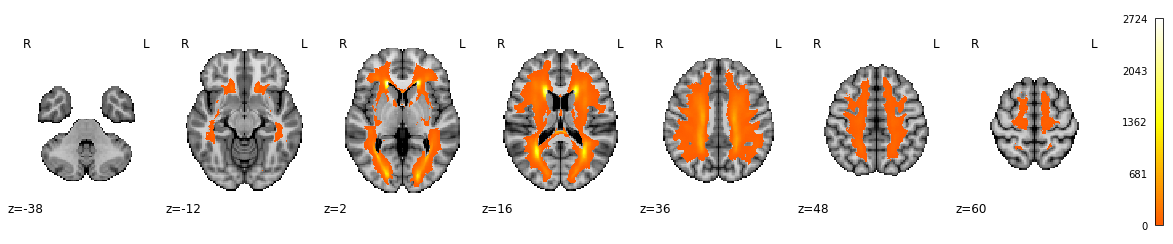

In [13]:
WMH_frequency_img = nib.load(project_dir/"input/WMH_frequency.nii")

display = plotting.plot_stat_map(WMH_frequency_img, colorbar=True,
                            threshold=10, cmap= "hot",
                            display_mode="z", draw_cross=False, cbar_tick_format ="%d",
                            symmetric_cbar=False, dim=-0.5, vmax = 2724,
                            cut_coords=(-38, -12, 2, 16, 36, 48, 60), radiological = True)
display.savefig(output_dir/f"wmh_frequency_map.png")